<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Elizabeth Ramírez Z.
- Nombre de alumno 2: Lucas Orellana J.


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ElLuquitas/MDS7202-labs)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [58]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

**1. Entrenamiento `XGBoost`**

Partimos con un pequeño análisis exploratorio:

In [3]:
# Nombres de columnas
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [4]:
# Tipo de dato de cada columna
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [5]:
# Cantidad de valores único en cada columna
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [6]:
# Cantidad de valores nulos en cada columna
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [7]:
# Descripción de los datos
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Por lo que se puede notar, el dataset contiene sólo características numéricas, las cuales muchas de ellas son indicadores positivo/negativo de algun estado (si se ha hecho algún chequeo, si fuma, si come fruta, entre otras), pero hay un cierto grupo de ellas que son más cuantitativas (edad, BMI, entre otras). Son estas últimas las que se deben escalar usando `MinMaxScaler` para poder trabajar con un dataset normalizado.

* Columnas indicativas ($\{x, y\}$): `Sex`, `HighChol`, `CholCheck`, `Smoker`, `HeartDiseaseorAttack`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `DiffWalk`, `Stroke`, `HighBP`.

* Columnas numéricas ($[x, y]$): `Age`, `BMI`, `GenHlth`, `MentHlth`, `PhysHlth`.

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_col = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
scaler = MinMaxScaler()
numeric_transformer = ColumnTransformer([
    ('scaler', scaler, num_col)
], remainder='passthrough',
   verbose_feature_names_out=False).set_output(transform='pandas')

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model = XGBClassifier()
pipeline = Pipeline([
    ('preprocessor', numeric_transformer),
    ('model', model)
], verbose=True)

In [62]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s


c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning:

[01:50:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     11736
         1.0       0.73      0.79      0.76     11593

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



**2.1. ¿Es acaso un buen predictor de diabetes?**

Podríamos decir que es un predictor débil, esto si tenemos en consideración que estamos diagnosticando a personas que pueden llegar a recibir un tratamiento que, en caso contrario, puede llegar a afectar la salud de los pacientes. En general este modelo tiene un desempeño bastante similar en clasificar a pacientes con y sin diabetes, teniendo un ligero mejor desempeño al clasificar a pacientes positivos.

**2.2. ¿Qué buscan explicar las métricas utilizadas?**

En este reporte tenemos 6 métricas:

- **Precision**: Es la proporción de observaciones que se clasifican de maenra correcta sobre todas las observaciones clasificadas como positivas. Busca evaluar qué tan preciso es el modelo para predecir la clase positiva, es decir, qué tan preciso es para identificar las clases realmente positivas.

- **Recall**: Es la proporción de observaciones positivas sobre el total de clases positivas. Busca dar un entendimiento sobre qué tan robusto es el modelo para detectar los casos positivos.

- **F1-Score**: Es un promedio entre *precision* y *recall*. Busca dar un equilibrio entre ambas métricas.

- **Accuracy**: Es la proporción de observaciones que se clasificaron de manera correcta sobre el total de clasificaciones. Busca dar un entendimiento general del modelo en términos de aciertos, independiente a la clase acertada.

- **Macro avg**: Promedia los resultados de una métrica para todas las clases, buscando dar una evaluación general del modelo con igual importancia para todas las clases.

- **Weighted avg**: Pondera también los resultados de una métrica para todas las clases, pero lo hace según el número de observaciones de cada clase, buscando dar una evaluación general del modelo teniendo en cuenta el desbalance entre clases.

**2.3. ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las *features*?**

Estas métricas no nos aseguran que el modelo hace una buena elección de *features*, ya que tal cual está es como una caja negra para nosotros, sin saber si se está realizando un sezgo sobre alguna variable, siendo representativo simplemente para un desempeño general.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

**1. Importancia de las *features***

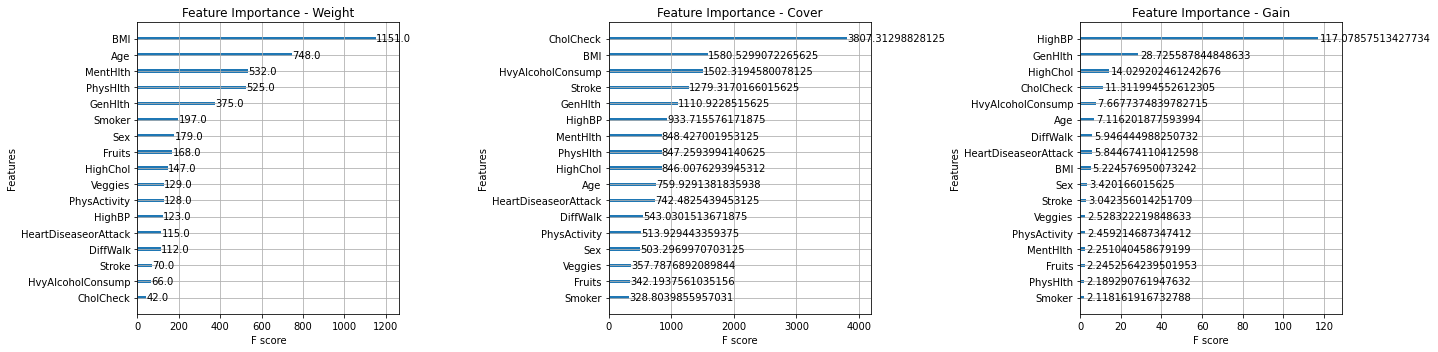

In [64]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb_model = pipeline.named_steps['model']

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Visualización de la importancia por "weight"
plot_importance(xgb_model, importance_type='weight', ax=axs[0])
axs[0].set_title("Feature Importance - Weight")

# Visualización de la importancia por "cover"
plot_importance(xgb_model, importance_type='cover', ax=axs[1])
axs[1].set_title("Feature Importance - Cover")

# Visualización de la importancia por "gain"
plot_importance(xgb_model, importance_type='gain', ax=axs[2])
axs[2].set_title("Feature Importance - Gain")

plt.tight_layout()
plt.show()

**2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?**

Viendo las gráficas podemos notar que los tres métodos no coinciden para nada en el orden e importancia de cada una de las *features* involucradas, siendo la más "radical" la que ocupa `gain`, ya que la primera característica posee una importancia muy alta comparada con el resto, mientras que `weight` y `cover` tienen comportamientos más o menos similares si consideramos las proporciones en que se asignan las importancias. Estas grandes diferencias se deben al funcionamiento y objetivo de cada uno de estos métodos:

- **Weight**: Mide cuántas veces una variable fue usada en los nodos de los árboles del modelo completo, reflejando así la frecuencia de uso de la variable para dividir los árboles.
- **Cover**: Mide la cobertura promedio de una variable sobre las observaciones totales al realizar una división. Mientras más abarque, mejor valoración tiene.
- **Gain**: Mide ganancia promedio de la precisión cuando se usa una cierta variable para la división, mostrando cuánto mejoran las predicciones cada vex que la variable es usada.

Cada método mide cosas bastante diferentes y, apoyado en los resultados obtenidos, estos métodos no son compatibles entre sí para ver la efectividad del modelo, necesitándose así un análisis diferente.

**3. ¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?**

Las importancias obtenidas no son suficientes para obtener la interpretabilidad de un modelo de estas características dados los muy diversos resultados obtenidos. Esto se debe principalmente a las siguientes falencias de cada método:

- **Weight**: Como cuenta sólo la frecuencia, no se sabe cuánto es lo que aporta la variable al rendimiento del modelo por cada vez que fue usada en los árboles.
- **Cover**: Pueden existir variables que afecten a muchas observaciones, cubriendo así gran parte de los datos, pero que al mismo tiempo no tengan un impacto significativo en el rendimiento.
- **Gain**: Pueden existir variables que aparezcan muy pocas veces, pero que sean muy importantes para el modelo en términos de rendimiento.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

**1. Implemetación de PDP**

In [14]:
from sklearn.inspection import permutation_importance
import numpy as np

In [65]:
# Reordena los features de testeo según el orden del modelo
X_test = X_test[xgb_model.get_booster().feature_names]

In [66]:
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
result

{'importances_mean': array([ 0.        ,  0.        ,  0.        ,  0.00393502,  0.01888636,
         0.00341635,  0.01882207,  0.00531099, -0.01212654,  0.00339063,
         0.0232929 ,  0.00999614,  0.00592396,  0.00192036,  0.00160744,
        -0.0005401 ,  0.04897767]),
 'importances_std': array([0.        , 0.        , 0.        , 0.00096552, 0.00065211,
        0.00072264, 0.00105268, 0.00049041, 0.00223651, 0.00061237,
        0.00156351, 0.00109248, 0.00080372, 0.00053256, 0.00036886,
        0.0003338 , 0.00102701]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+

Para verlo de forma más clara, lo podemos graficar de la siguiente manera:

In [67]:
perm_importance_df = pd.DataFrame({
    'feature': xgb_model.get_booster().feature_names,
    'mean': result.importances_mean,
    'std': result.importances_std
})

perm_importance_df

,feature,mean,std
0,Age,0.000000,0.000000
1,BMI,0.000000,0.000000
2,GenHlth,0.000000,0.000000
3,MentHlth,0.003935,0.000966
4,PhysHlth,0.018886,0.000652
5,Sex,0.003416,0.000723
6,HighChol,0.018822,0.001053
7,CholCheck,0.005311,0.000490
8,Smoker,-0.012127,0.002237
9,HeartDiseaseorAttack,0.003391,0.000612


In [68]:
import plotly.express as px

perm_importance_df = perm_importance_df.sort_values(by='mean', ascending=True)
fig = px.bar(perm_importance_df, x='mean', y='feature', orientation='h', error_x='std')
fig.update_layout(title='Gráfico PDP "mean" y "std"', xaxis_title='Error', yaxis_title='Feature')
fig.show()

**2. Más repeticiones y `std`**

In [44]:
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42)

In [45]:
perm_importance_df = pd.DataFrame({
    'feature': xgb_model.get_booster().feature_names,
    'mean': result.importances_mean,
    'std': result.importances_std
})

perm_importance_df

,feature,mean,std
0,Age,0.000000,0.000000
1,BMI,0.000000,0.000000
2,GenHlth,0.000000,0.000000
3,MentHlth,0.004114,0.001037
4,PhysHlth,0.018269,0.001624
5,Sex,0.003438,0.000743
6,HighChol,0.018959,0.001157
7,CholCheck,0.005287,0.000485
8,Smoker,-0.012331,0.001999
9,HeartDiseaseorAttack,0.003459,0.000696


**3. Visualización en gráfico**

In [46]:
perm_importance_df = perm_importance_df.sort_values(by='mean', ascending=True)
fig = px.bar(perm_importance_df, x='mean', y='feature', orientation='h', error_x='std')
fig.update_layout(title='Gráfico PDP "mean" y "std"', xaxis_title='Error', yaxis_title='Feature')
fig.show()

Si comparamos ambos procesos (uno con 10 repeticiones y el otro con 30), podemos notar que tanto el promedio como la desviación estándar varían. La desviación estándar en los resultados de la importancia de características por permutación indica la consistencia del impacto de cada característica en la precisión del modelo a través de las repeticiones. Una desviación estándar baja sugiere que el cambio en la precisión debido a la permutación de esa característica es estable y predecible en múltiples ejecuciones, lo cual da confianza en la importancia de esa característica. Por otro lado, una desviación estándar alta señalaría que la importancia de la característica es menos consistente y puede variar, lo que podría indicar que su impacto depende de la interacción con otras variables o de la variabilidad en el conjunto de datos. En este caso, en general la desviación es baja. 

**4. Respuesta a algunas preguntas**

**¿Cómo mide la importancia de las features su propuesta?**

Para este caso, la importancia de las *features* se mide a través del métod de permutación, en donde en cada iteración se reorganizan los valores de esa columna y se ve el impacto que este cambio tiene sobre el desempeño del modelo. Si se tiene unamayor pérdida de rendimiento al hacer estas permutaciones para una cierta característica, entonces esta es importante en el modelo, ya que de ella depende en mayor medida el modelo para realizar las predicciones.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?**

Las 5 primeras *features* que tienen más impacto en el modelo son:

1. `HighBP`: Indica si la persona tiene ($1$) o no ($0$) la presión sanguínea alta.
2. `PhysActivity`: Indica si la persona hace ($1$) o no ($0$) actividad física.
3. `HighChol`: Indica si la persona hace ($1$) o no ($0$) altos niveles de colesterol.
4. `PhysHlth`: Indica si la persona hace ($1$) o no ($0$) una buena salud física.
5. `Fruits`: Indica si la persona consume ($1$) o no ($0$) fruta.

Es importante recordar que no contamos con más información de las variables más allá del nombre y los valores que pueden tomar, por lo que, por ejemplo, no sabemos si la variable `Fruits` indica si la persona consume una porción de frutas adecuada o si es derechamente consumo de frutas en general (si come o no, no importa la cantidad). Independiente a esta incertidumbre, podemosa decir que estas variables sí tienen relación con aspectos importantes a considerar al diagnosticar el riesgo de padecer diabetes, principalmente las 4 primeras variables.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Si vemos los *feature importances* de los métodos anteriores y este nuevo, podemos ver los siguientes resultados:
| Top |  `Weight`  |       `Cover`       |       `Gain`        |  `Permutation` |
|-----|------------|---------------------|---------------------|----------------|
| 1   | `BMI`      | `CholCheck`         | `HighBP`            | `HighBP`       |
| 2   | `Age`      | `BMI`               | `GenHlth`           | `PhysActivity` |
| 3   | `MentHlth` | `HvyAlcoholConsump` | `HighChol`          | `HighChol`     |
| 4   | `PhysHlth` | `Stroke`            | `CholCheck`         | `PhysHlth`     |
| 5   | `GenHlth`  | `GenHlth`           | `HvyAlcoholConsump` | `Fruits`       |



**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [21]:
!pip install shap

In [22]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

**1. Cálculo de los *shap values***

In [28]:
import shap

# Dado que XGBoost es un modelo tipo árbol, se utiliza el explainer de tipo Tree
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_test)

shap_values

.values =
array([[ 4.85650420e-01, -3.90606374e-03,  6.51028097e-01, ...,
        -9.62023586e-02, -1.50870755e-02, -7.32358873e-01],
       [ 3.14346522e-01,  4.31119800e-01,  4.62925881e-01, ...,
        -1.85534492e-01, -2.04294780e-03,  4.80476171e-01],
       [-2.37458006e-01,  8.50231647e-01,  7.65623748e-01, ...,
         5.42955287e-02, -1.98525302e-02,  5.49033940e-01],
       ...,
       [ 4.71706867e-01, -3.05651993e-01,  4.32199389e-01, ...,
         1.61251545e-01,  1.08980775e-01,  4.96993095e-01],
       [ 4.87886369e-01,  1.91479158e+00,  8.05980206e-01, ...,
         1.32388040e-01,  6.34538615e-03, -7.63138592e-01],
       [ 5.40037632e-01,  2.23292661e+00,  4.71893132e-01, ...,
        -2.09555835e-01, -7.70992599e-03,  5.28236568e-01]], dtype=float32)

.base_values =
array([-0.0023599, -0.0023599, -0.0023599, ..., -0.0023599, -0.0023599,
       -0.0023599], dtype=float32)

.data =
array([[ 5., 24.,  1., ...,  0.,  0.,  0.],
       [11., 36.,  3., ...,  0.,  0.,  1.]

**2. ¿Qué representa cada número en su resultado?**

El cálculo de los `shap_values` entrega 3 arreglos distintos:

1. `values`: representa el impacto de cada característica en la predicción hecha para cada una de las observaciones. Son esencialmente los `shap_values` calculados.
2. `base_values`: representa el valor de referencia (valor esperado) de la predicción si es que no hubiese características específicas involucradas.
3. `data`: representa los valores de entrada para cada una de las observaciones.

Podemos decir que las predicciones hechas por el modelo se componen de, para cada una de las observaciones, el `base_values` sobre el cual se van sumando los `shap_values` calculados.

**3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?**

Sí, existe un significado para la positividad o negatividad de cada uno de los valores obtenidos:

- Valores **positivos**: Cuando un `shap_value` presenta un valor positivo para una característica dentro de una observación, significa que su impacto "empuja" a la predicción a una mayor pertenencia a la clase positiva, por lo que, mientras más alto sea el valor, más peso tiene esta característica a clasificar como positiva la observación.

- Valores **negativos**: Cuando un `shap_value` presenta un valor negativo para una característica dentro de una observación, tenemos el caso contrario al anterior, ya que se "empuja" a una mayor pertenencia a la clase negativa. Mientras más negativo sea el valor, más peso tiene a clasificar en la clase negativa.

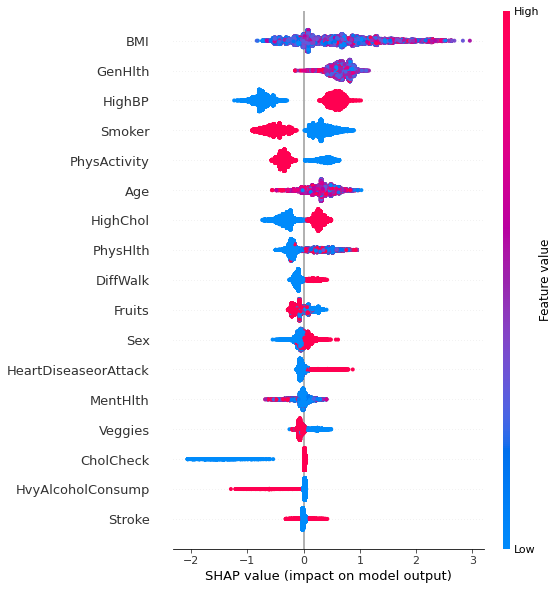

In [24]:
shap.summary_plot(shap_values, X_test)

Si vemos por ejemplo la variable `HighBP`, podemos ver una tendencia: si se tienen valores altos (en este caso el valor alto es $1$), entonces esta variable tiende a empujar las predicciones hacia una clase positiva, mientras que las predicciones bajas (en este caso es el valor $0$) empujan a clasificar como clase negativa.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

**1. Gráficos de aportes locales**

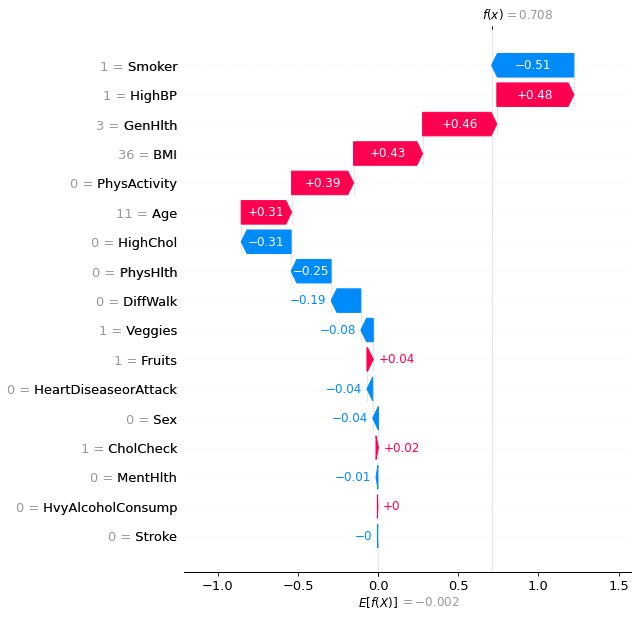

In [25]:
idx=1

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

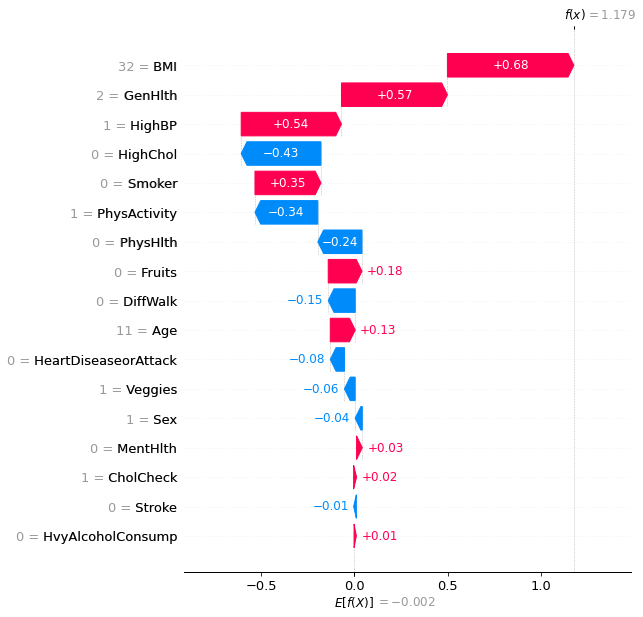

In [26]:
idx=9

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

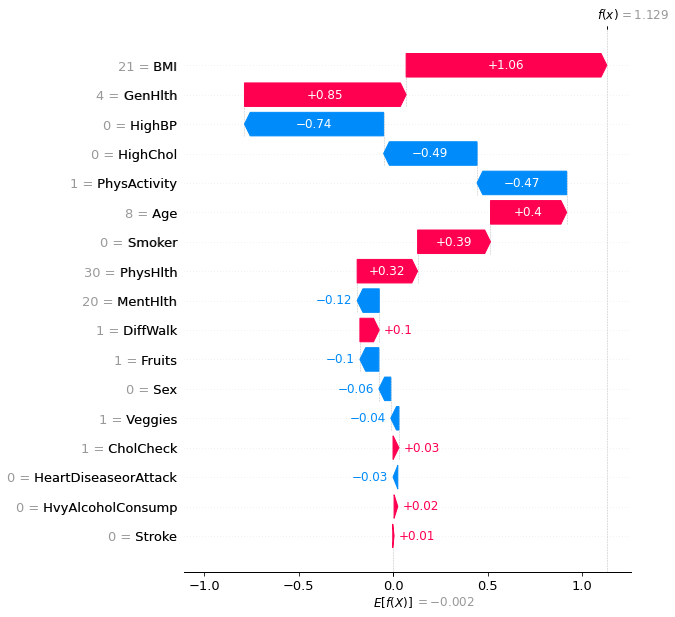

In [27]:
idx=150

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

**2. Interpretación de resultados**

**¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?**

Podemos hacer una tabla con cada una de las variables para primero organizar los resultados:

| Variable | Observación 1 | Observación 9 | Observación 150 |
|----------|---------------|---------------|-----------------|
| `Age` | +0.31 | +0.13 | +0.4 |
| `Sex` | -0.04 | -0.04 | -0.06 |
| `HighChol` | -0.31 | -0.43 | -0.49 |
| `CholCheck` | +0.02 | +0.02 | +0.03 |
| `BMI` | +0.43 | +0.68 | +1.06 |
| `Smoker` | -0.51 | +0.35 | +0.39 |
| `HeartDiseaseorAttack` | -0.04 | -0.08 | -0.03 |
| `PhysActivity` | -0.25 | -0.34 | -0.47 |
| `Fruits` | +0.04 | +0.18 | -0.1 |
| `Veggies` | -0.08 | -0.06 | -0.04 |
| `HvyAlcoholConsump` | +0 | +0.01 | +0.02 |
| `GenHlth` | +0.46 | +0.57 | +0.85 |
| `MentHlth` | -0.01 | +0.03 | -0.12 |
| `PhysHlth` | -0.25 | -0.24 | +0.32 |
| `DiffWalk` | -0.19 | -0.15 | +0.1 |
| `Stroke` | -0 | -0.01 | +0.01 |
| `HighBP` | +0.48 | +0.54 | -0.74 |

Con esta comparación mucho más directa, podemos hacer un pseudo-ranking de las variables que aportan más y menos a la probabilidad de poseer diabetes (consistentes en común):

- **Más probabilidades de poseer diabetes**
    1. `GenHlth`
    2. `BMI`
    2. `Age`

- **Menos probabilidades de poseer diabetes**
    1. `HighChol`
    2. `PhysActivity`
    2. `Veggies`

Además, existen otras variables que resultan beneficiosas para algunas observaciones (menos probabilidad de poseer diabetes), pero que para otras son perjudiciales (mayor probabilidad de poseer diabetes). Ejemplos de estas variable son:

* `Smoker`: beneficioso para Obs. 1, perjudicial para Obs 9 y 150.
* `Fruits`: beneficioso para Obs. 150, perjudicial para Obs. 1 y 9.
* `MentHlth`: beneficioso para Obs. 1 y 150, perjudicial para Obs. 9.
* `PhysHlth`: beneficioso para Obs. 1 y 9, perjudicial para Obs. 150.
* `DiffWalk`: beneficioso para Obs. 1 y 9, perjudicial para Obs. 150.
* `Stroke`: beneficioso para Obs. 1 y 9, perjudicial para Obs. 150.
* `HighBP`: beneficioso para Obs. 150, perjudicial para Obs. 1 y 9.

**¿Existe algún patrón común entre las instancias analizadas?**

Siguiendo con la respuesta anterior, hay algunas variables que, para estas 3 observaciones, presentan patrones tanto positivos (aumento de probabilidad de poseer diabetes) como negativos (disminución de probabilidad de poseer diabetes) constantes, teniendo un impacto más o menos similar en las 3 observaciones.

- Impacto **positivo** constante:

- Impacto **negativo** constante:


**¿Es posible generalizar estas conclusiones a todo el dataset?**

Como se vio también en la primera respuesta

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [ ]:
# Inserte código para generar gráficos de aporte global aquí

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnósticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>